# Olympic Atheletes Dataset from 1896 to 2016
### - Dataset has two files, One is main file which has all record of Winner Region wise
### - 2nd file has NOC file with National Olympic Committee Codes

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [311]:
# Import Dataset 
df_athlete= pd.read_csv('athlete_events.csv')
df_noc=pd.read_csv('noc_regions.csv')

In [3]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Merge Two Dataset to make one file for EDA

In [5]:
df_athlete_join=df_athlete.merge(df_noc,how='left', on='NOC')

In [6]:
# Check first five record of Merged Dataset
df_athlete_join.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [313]:
print("Dataset has",df_athlete_join.shape[0],"No of Rows")

Dataset has 271116 No of Rows


In [315]:
print("Dataset has",df_athlete_join.shape[1],"No of Columns")

Dataset has 17 No of Columns


In [8]:
# Check Column Names
df_athlete_join.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
# Change the Columns Names
df_athlete_join.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [12]:
df_athlete_join.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
# Check Null Values
df_athlete_join.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [14]:
# Check the dataset Structure
df_athlete_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [15]:
# Descriptive Analysis
df_athlete_join.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### View Record of Pakistani Team in Dataset

In [22]:
df_athlete_join[df_athlete_join.Team=='Pakistan']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,NaN,Pakistan,NaN
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,NaN,Pakistan,NaN
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,Pakistan,NaN
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Pakistan,NaN
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Pakistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268234,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 400 metres,NaN,Pakistan,NaN
268235,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,Pakistan,NaN
269610,134907,Qamar Zia,M,22.0,168.0,61.0,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze,Pakistan,NaN
269611,134908,Qasim Zia,M,22.0,174.0,71.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN


### No of Top 10 Countries (Athelete Teams participated)

In [321]:
top_10_countries=df_athlete_join.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:xlabel='Team', ylabel='Team'>

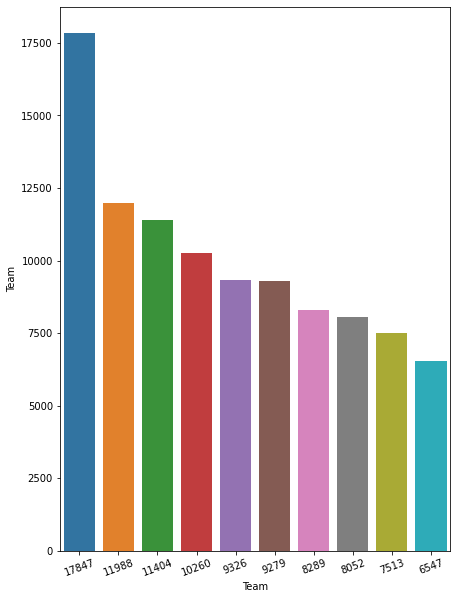

In [319]:
plt.figure(figsize=(7,10))
plt.xticks(rotation=20)
sns.barplot(data=top_10_countries,x=top_10_countries.index, y=top_10_countries,order=top_10_countries)

### Visualize the Age column distribution

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

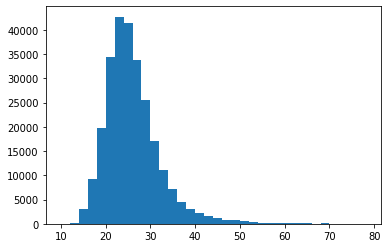

In [37]:
plt.hist(df_athlete_join.Age, bins=np.arange(10,80,2))

### Check the Winter Season Olympic Sports

In [44]:
winter_season_sports= df_athlete_join[df_athlete_join.Season=="Winter"].Sport.unique()
winter_season_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

### Check Summer Season Olympic sports

In [46]:
summer_season_sports= df_athlete_join[df_athlete_join.Season=="Summer"].Sport.unique()
summer_season_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Check Total number of Males and Females Participated in Atheletes Olympics

In [58]:
Gender_Player_count= df_athlete_join['Sex'].value_counts()
Gender_Player_count


M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1b2cc2eb880>,
 [Text(-0.8446821101731202, 0.9881862844390652, 'M'),
  Text(0.7147309380136029, -0.8361576922125369, 'F')],
 [Text(-0.5198043754911509, 0.6081146365778862, '72.5%'),
  Text(0.38985323891651064, -0.45608601393411097, '27.5%')])

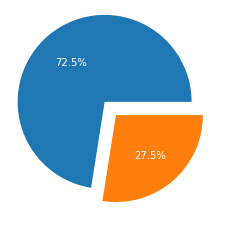

In [66]:
my_explode=(0.2,0.0)
plt.pie(Gender_Player_count,labels=Gender_Player_count.index, autopct='%1.1f%%',textprops={'color':'white'}, explode=my_explode)


### Check total No of Medal with Medal Categories

In [68]:
total_medals=df_athlete_join.Medal.value_counts()
total_medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Check how many medal Pakistan achieved during from 1896 till 2016

In [317]:
from ast import IsNot
from asyncio.windows_events import NULL
from cmath import isnan

medal_won_by_pakistan= df_athlete_join[(df_athlete_join.Team=='Pakistan') & (df_athlete_join.Medal.isin(['Gold','Bronze','Silver']))][['Team', 'Medal']].value_counts().reset_index()
medal_won_by_pakistan

,Team,Medal,0
0,Pakistan,Silver,45
1,Pakistan,Gold,42
2,Pakistan,Bronze,34


Text(0, 0.5, 'No of Medal')

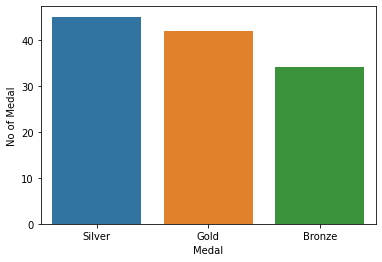

In [323]:

sns.barplot(data=medal_won_by_pakistan,x=medal_won_by_pakistan.Medal,y=medal_won_by_pakistan[0])
plt.ylabel("No of Medal")

### Top 10 Countries Got maximum No of Medals

In [127]:
df_athlete_join.Medal.isin(['Gold','Bronze','Silver']).groupby(df_athlete_join.Team).sum().sort_values(ascending=False).head(10)



Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64

### No of Females Atheletes yearwise

In [324]:
female_count_yearwise=df_athlete_join[df_athlete_join.Sex=='F'][['Sex',"Year"]]
female_count_yearwise1=female_count_yearwise.groupby(female_count_yearwise.Year).count().reset_index()
female_count_yearwise1.head()


,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


Text(0, 0.5, 'No of Females')

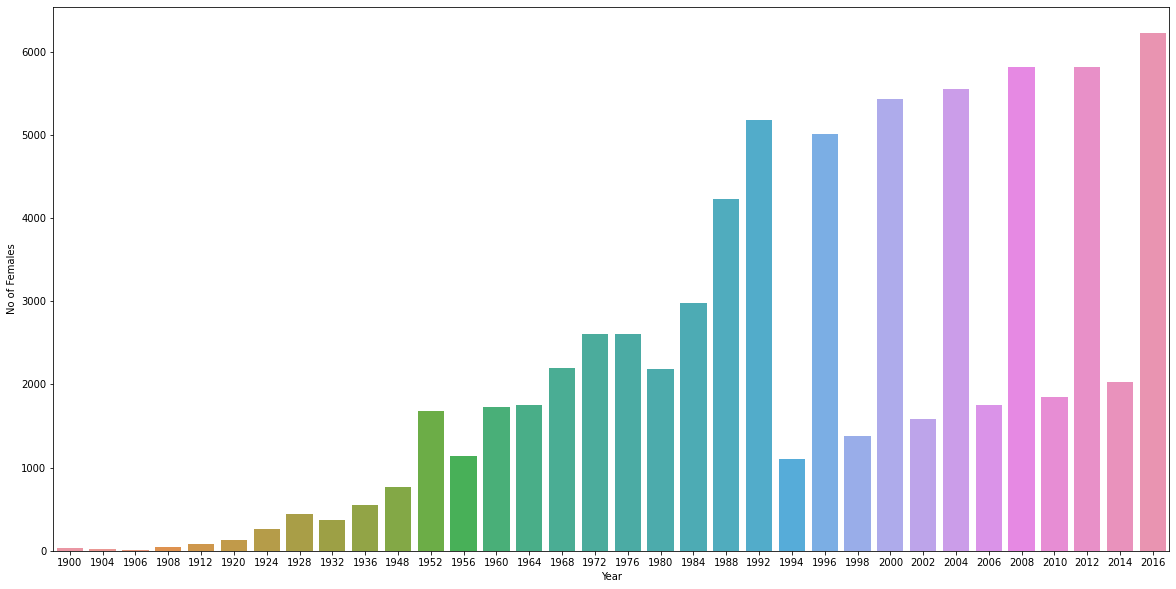

In [325]:
plt.figure(figsize=(20,10))
sns.barplot(data=female_count_yearwise1, x=female_count_yearwise1.Year,y=female_count_yearwise1.Sex)
plt.ylabel("No of Females")

### Countries Obtained Gold Medals

In [231]:
goldmedal=df_athlete_join[df_athlete_join.Medal=='Gold']

### Top 5 Countries obtained maxium No of Gold Medals

In [260]:
top_5_region_goldmedal=goldmedal.Region.value_counts().sort_values(ascending=False).reset_index(name='Medal').head(5)
top_5_region_goldmedal

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Top 5 Counties-Highest No of Gold Medal')

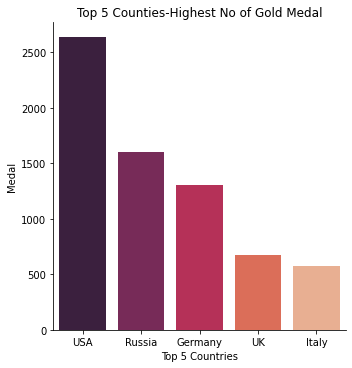

In [258]:
sns.catplot(data=top_5_region_goldmedal,x='index',y='Medal',kind='bar', palette='rocket')
plt.xlabel("Top 5 Countries")
plt.title("Top 5 Counties-Highest No of Gold Medal")

### Pakistan obtained Gold Medal till 2016

In [284]:
goldmedal[goldmedal.Region=='Pakistan']['Region'].value_counts()

Pakistan    42
Name: Region, dtype: int64

### In 2016 , TOP 10 Countries got Gold Medal

In [305]:
top_10_countries_got_gm=goldmedal[goldmedal.Year==2016].groupby(goldmedal.Team)['Team'].count().sort_values(ascending=False).reset_index(name="Medal").head(10)
top_10_countries_got_gm.Team

0    United States
1    Great Britain
2           Russia
3          Germany
4            China
5           Brazil
6        Australia
7        Argentina
8           France
9            Japan
Name: Team, dtype: object

<AxesSubplot:xlabel='Medal', ylabel='Team'>

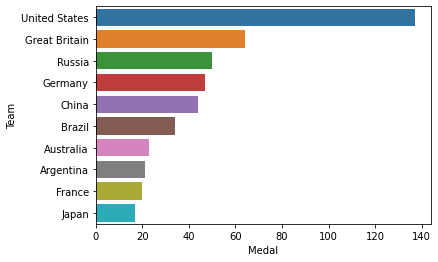

In [307]:
sns.barplot(data=top_10_countries_got_gm, y='Team', x=top_10_countries_got_gm.Medal)

In [310]:
df_athlete_join.Year.min()

1896

In [326]:
not_null_relation=df_athlete_join[(df_athlete_join.Height.notnull()) & (df_athlete_join.Weight.notnull())]

<AxesSubplot:xlabel='Height', ylabel='Weight'>

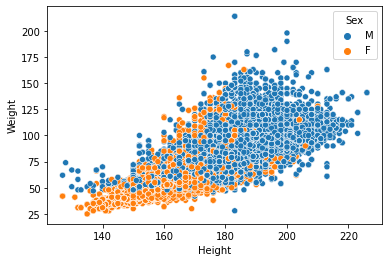

In [328]:
sns.scatterplot(data=not_null_relation,x='Height', y='Weight',hue='Sex')

### Obsersations: Mostly females are of under Height of 175cm and weight 75kg, while Male are arround Height of 220cm and Weight of 160kg